In [ ]:
from functools import reduce
from itertools import product

import numpy as np
import seaborn as sns
from ipywidgets import (FloatLogSlider, FloatRangeSlider, FloatSlider,
                        IntSlider, interact, interactive)
from matplotlib import pyplot as plt

from utils import demo, imshow, linear, pad, panels

In [ ]:
sns.set_theme()

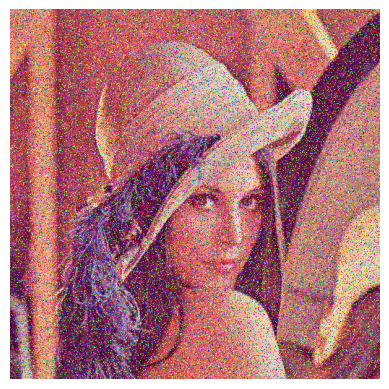

In [109]:
image = plt.imread('Lenna.png')
# image = plt.imread('lenna.jpg') / 256
noized = image.copy()
noize = np.random.rand(*noized.shape)
p = 0.1
noized[noize < p] = 0
noized[noize > (1-p)] = 1
imshow(noized)

In [110]:
def median(image: np.ndarray, window: int) -> np.ndarray:
    assert window & 1
    w, h, *_ = image.shape
    padded = pad(image, window//1)
    return np.median(
        [ padded[x:x+w, y:y+h, ...]
          for x, y in product(range(window), repeat=2) ],
        axis=0
    )


@interact
def _(window=IntSlider(value=3, min=1, max=11, step=2)):
    left, right = panels()
    filtred = median(noized, window)
    imshow(filtred, left)
    imshow(np.abs(filtred-image), right)

interactive(children=(IntSlider(value=3, description='window', max=11, min=1, step=2), Output()), _dom_classes…

In [111]:
def average(size: int) -> np.ndarray:
    return np.full((size, size), 1/size**2)

@interact
def _(window=IntSlider(value=3, min=1, max=21, step=2)):
    left, right = panels()
    kernel = np.full((window, window), 1/window**2)
    filtred = linear(noized, average(window))
    imshow(filtred, left)
    imshow(np.abs(filtred-image), right)

interactive(children=(IntSlider(value=3, description='window', max=21, min=1, step=2), Output()), _dom_classes…

In [ ]:
def gusina(x: np.ndarray ,sigma: int) -> np.ndarray:
    a = 1 / (sigma * np.sqrt(2 * np.pi))
    b = 0
    c = sigma            
    return a * np.exp(-(x-b)**2/(2*c**2))

def gauss(window,sigma: int) -> np.ndarray:
    v1 = np.full((window,1),window-1)
    vconst1 = np.ones((window,1))
    a = np.arange(window)
    b = a[::-1]
    vconstm = gusina(a-b,sigma)
    vconstm = vconstm.reshape((window,1))
    kernel  =  np.matmul(v1, vconst1.T) + np.matmul(vconstm ,v1.T)
    gus = kernel / np.sum(kernel)
    return gus

@interact
def _(window=IntSlider(value=3, min=1, max=21, step=2)):
    left, right = panels()
    filtred = linear(noized, gauss(window,1))
    imshow(filtred, left)
    imshow(np.abs(filtred-image), right)

interactive(children=(IntSlider(value=3, description='window', max=21, min=1, step=2), Output()), _dom_classes…